# 교통사고유형별 발생분석
<hr>
- 공공 데이터 교통사고 유형, 검색어: 전국교통사고다발지역표준데이터
<hr>
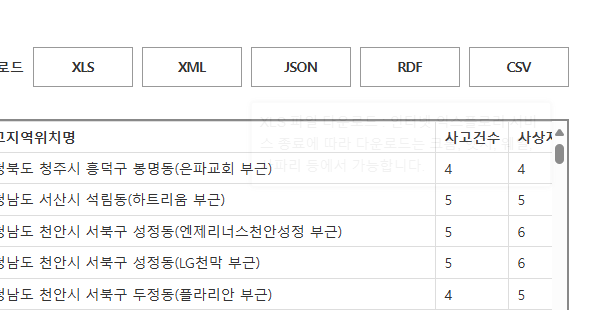

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import matplotlib.pyplot as plt
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2coding"

In [3]:
file_path = "./ref/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")

In [17]:
ori_data = ori.groupby("사고유형구분")['사고건수'].sum().reset_index(name='count') #사고유형구분을 제외하고 다 더함
ori_data = ori_data.sort_values('count',ascending=False)
ori_data = ori_data.rename(columns={'사고유형구분':'type'}) # '사고건수':'count'})
ori_data

,type,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


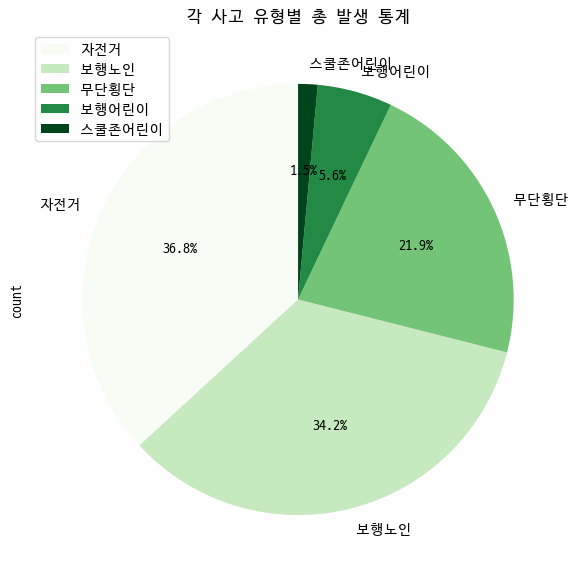

In [18]:
ori_data.plot(
    kind = 'pie',
    y = 'count',
    labels = ori_data['type'],
    autopct='%2.1f%%',
    startangle=90,
    figsize=(7,7),
    title='각 사고 유형별 총 발생 통계',
    cmap=matplotlib.cm.Greens
)
plt.savefig("./chart/accident")
plt.show()

In [19]:
ex_data = ori.copy()
ex_data = ex_data.rename(columns ={'사고연도':'year','사고유형구분':'type','사고건수':'accident'}) #columns 이름변경
arr_data = list(set(ex_data['type'])) #type열에있는 종류 리스트로 추출
data_list = []
for t in arr_data:
    data_list.append(ex_data[ex_data['type'] == t]) #data_list에 type 종류별로 리스트화

# 단축
# data_list = [group for _ , group in ex_data.groupby('type')]

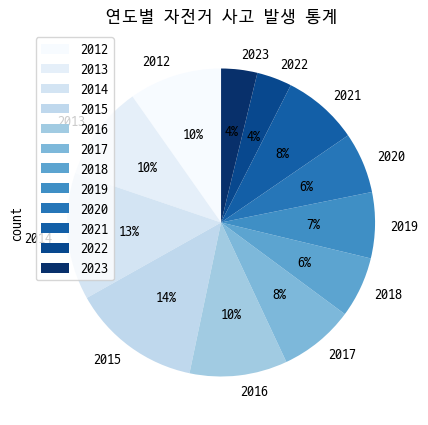

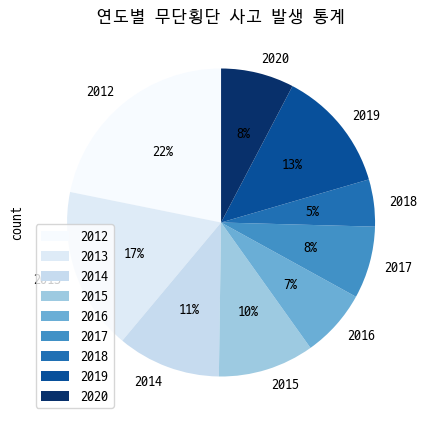

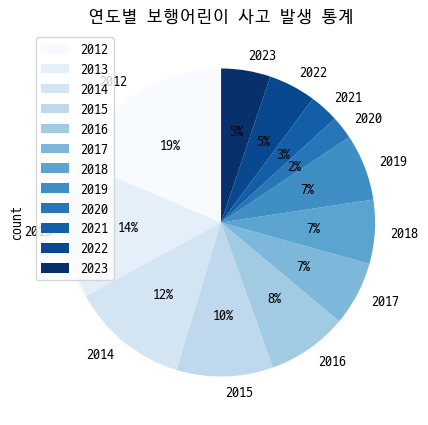

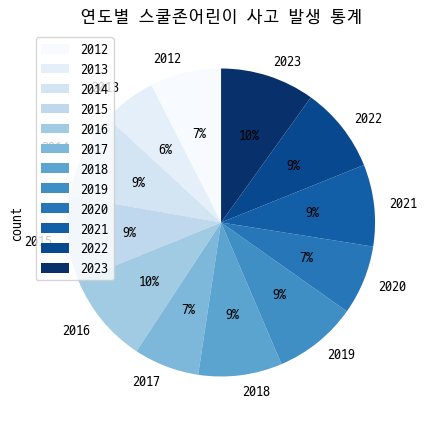

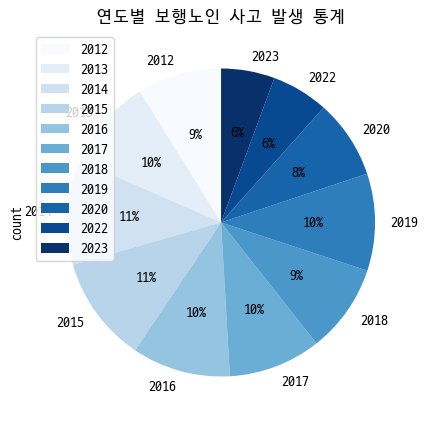

In [20]:
total_list = []
for d in data_list:
    result = d.groupby('year')['accident'].sum().reset_index(name='count')
    total_list.append(result)
    

for i in range(len(arr_data)):
    total_list[i].plot(
        kind = 'pie',
        y = 'count',
        labels = total_list[i]['year'],
        figsize=(5,5),
        startangle=90,
        autopct = '%.f%%',
        title = f'연도별 {arr_data[i]} 사고 발생 통계',
        cmap = matplotlib.cm.Blues)
    plt.savefig(f'./chart/chart{i}.png')

In [43]:
from IPython.display import display, HTML
# HTML 생성
html = f"""
<div style="display: flex ;flex-wrap:wrap;width:1000px;">
    <div style="flex: 1; min-width:300px";>
        <div style="padding: 10px 0 10px 80px;">
        <h3>Data Table</h3>
        {ori_data.to_html(index=False)}
        </div>
    </div>"""
for v in range(len(arr_data)):
    html += f"""<div style="flex: 1; padding: 10px; min-width:300px">
            <h3>Pie Chart{v+1}</h3>
            <img src="./chart/chart{v}.png" alt="Pie Chart">
        </div>"""
html+=f"""</div> """
    # HTML 표시
# print(html)
display(HTML(html))

type,count
자전거,24939
보행노인,23165
무단횡단,14805
보행어린이,3802
스쿨존어린이,989


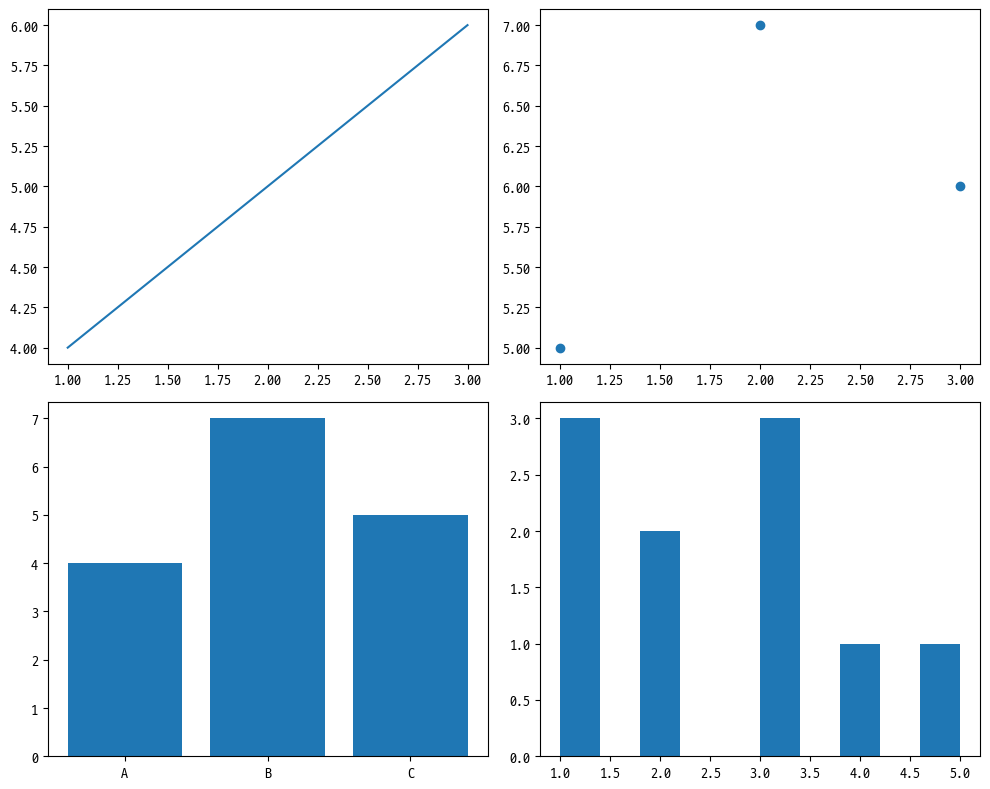

In [30]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(10,8)) # 2  x 2 서브플롯 생성

axs[0,0].plot([1,2,3],[4,5,6])

axs[0,1].scatter([1,2,3],[5,7,6])

axs[1,0].bar(['A','B','C'],[4,7,5])

axs[1,1].hist([1,1,1,3,3,3,2,2,4,5],bins=10)
plt.tight_layout()
plt.show()